<a href="https://colab.research.google.com/github/jwalx/Machine-Learning/blob/main/Machine_Learning_practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

In [2]:
cols = ["fLength", "fWidth", "fSize", "fConc", "fConc1", "fAsym", "fM3Long", "fM3Trans", "fAlpha", "fDist", "class"]
df = pd.read_csv("/content/drive/MyDrive/data/magic04.data",names=cols)
df.head()

fLength    fWidth   fSize   fConc  fConc1     fAsym  fM3Long  fM3Trans  \
0   28.7967   16.0021  2.6449  0.3918  0.1982   27.7004  22.0110   -8.2027   
1   31.6036   11.7235  2.5185  0.5303  0.3773   26.2722  23.8238   -9.9574   
2  162.0520  136.0310  4.0612  0.0374  0.0187  116.7410 -64.8580  -45.2160   
3   23.8172    9.5728  2.3385  0.6147  0.3922   27.2107  -6.4633   -7.1513   
4   75.1362   30.9205  3.1611  0.3168  0.1832   -5.5277  28.5525   21.8393   

    fAlpha     fDist class  
0  40.0920   81.8828     g  
1   6.3609  205.2610     g  
2  76.9600  256.7880     g  
3  10.4490  116.7370     g  
4   4.6480  356.4620     g

In [3]:
df["class"]=(df["class"] == "g").astype(int)

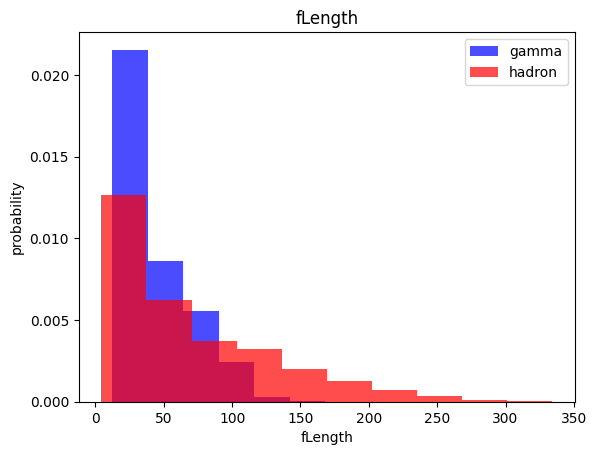

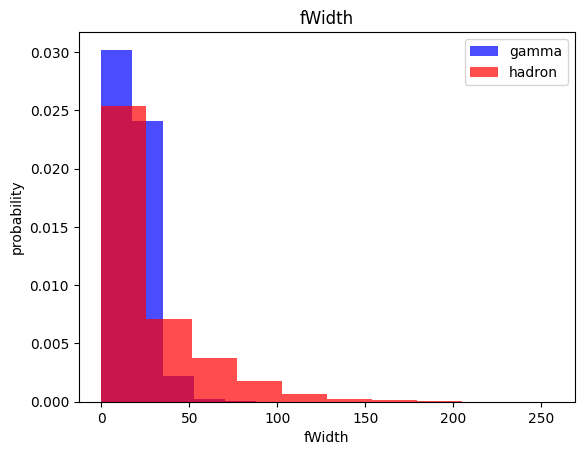

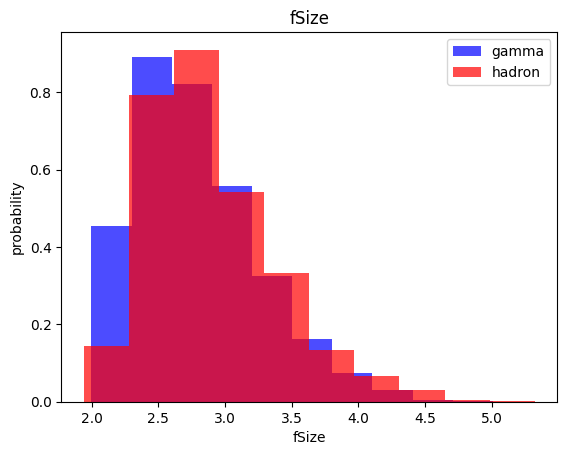

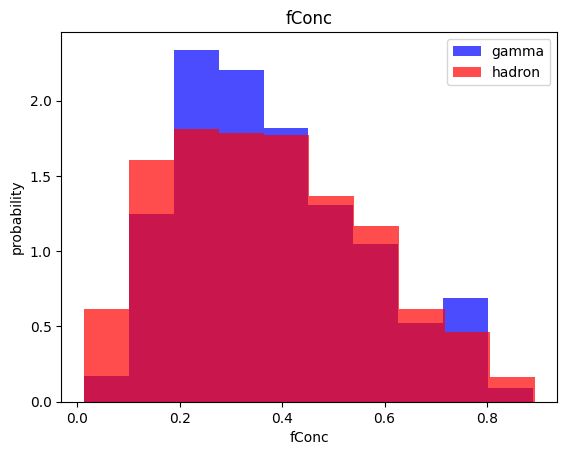

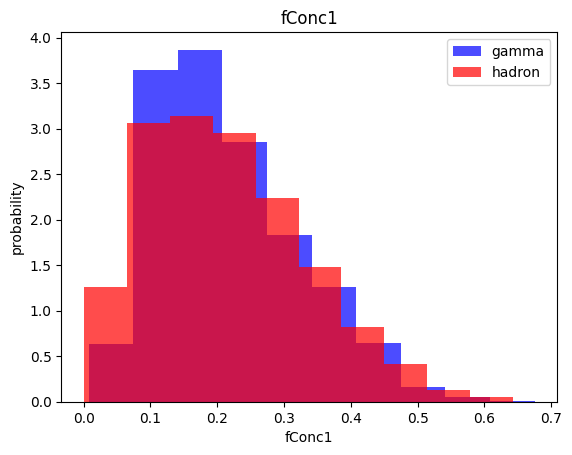

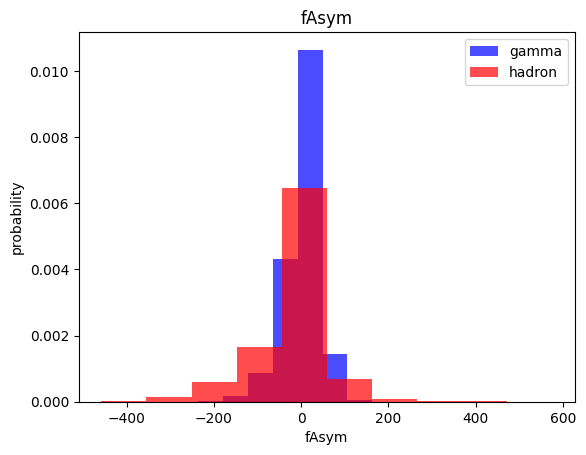

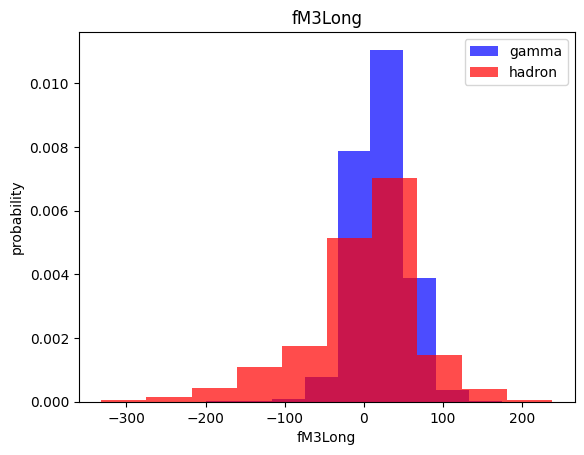

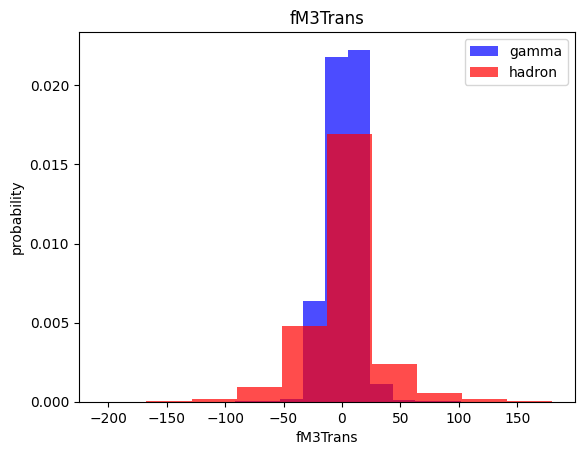

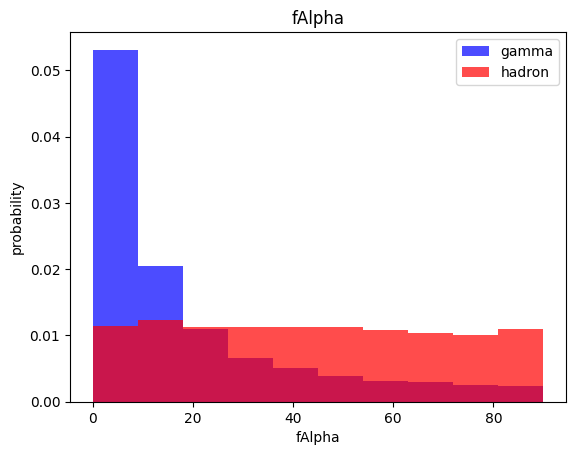

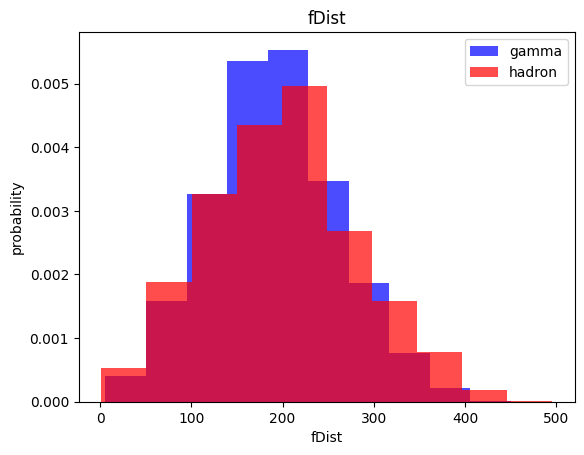

In [4]:
for label in cols[:-1]:
  plt.hist(df[df["class"]==1][label],label="gamma",color = "blue",alpha=0.7,density=True)
  plt.hist(df[df["class"]==0][label],label="hadron",color = "red",alpha=0.7,density=True)
  plt.title(label)
  plt.ylabel("probability")
  plt.xlabel(label)
  plt.legend()
  plt.show()


In [5]:
train,valid,test = np.split(df.sample(frac=1),[int(0.6*len(df)),int(0.8*len(df))])

In [6]:
def scale_dataset(dataframe, oversample=False):
  X = dataframe[dataframe.columns[:-1]].values
  y = dataframe[dataframe.columns[-1]].values

  scaler = StandardScaler()
  X = scaler.fit_transform(X)

  if oversample:
    ros = RandomOverSampler()
    X, y = ros.fit_resample(X, y)

  data = np.hstack((X, np.reshape(y, (-1,1))))

  return data, X, y

In [7]:
train,X_train,y_train = scale_dataset(train, oversample=True)
valid,X_valid,y_valid = scale_dataset(valid,oversample=False)
test,X_test,y_test= scale_dataset(test,oversample=False)

#kNN

In [8]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [9]:
knn_model =KNeighborsClassifier(n_neighbors = 1)
knn_model.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [10]:
y_pred = knn_model.predict(X_test)

In [11]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.75      0.68      0.71      1300
           1       0.84      0.88      0.86      2504

    accuracy                           0.81      3804
   macro avg       0.80      0.78      0.79      3804
weighted avg       0.81      0.81      0.81      3804



# Naive Bayes

In [12]:
from sklearn.naive_bayes import GaussianNB

In [13]:
nb_model=GaussianNB()
nb_model = nb_model.fit(X_train,y_train)

In [14]:
y_pred = nb_model.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.67      0.40      0.50      1300
           1       0.74      0.90      0.81      2504

    accuracy                           0.73      3804
   macro avg       0.70      0.65      0.66      3804
weighted avg       0.72      0.73      0.71      3804



# Logistic Regression

In [15]:
from sklearn.linear_model import LogisticRegression

In [16]:
lg_model= LogisticRegression()
lg_model = lg_model.fit(X_train,y_train)

In [17]:
y_pred = lg_model.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.68      0.72      0.70      1300
           1       0.85      0.82      0.84      2504

    accuracy                           0.79      3804
   macro avg       0.76      0.77      0.77      3804
weighted avg       0.79      0.79      0.79      3804



# SVM

In [18]:
from sklearn.svm import SVC

In [19]:
svm_model = SVC()
svm_model = svm_model.fit(X_train,y_train)

In [20]:
y_pred=svm_model.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.80      0.79      0.79      1300
           1       0.89      0.89      0.89      2504

    accuracy                           0.86      3804
   macro avg       0.84      0.84      0.84      3804
weighted avg       0.86      0.86      0.86      3804



# Neural Net

In [21]:
def plot_history(history):
  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 6))
  ax1.plot(history.history['loss'], label='loss')
  ax1.plot(history.history['val_loss'], label='val_loss')
  ax1.set_xlabel('Epoch')
  ax1.set_ylabel('Binary crossentropy')
  ax1.grid(True)

  ax2.plot(history.history['accuracy'], label='accuracy')
  ax2.plot(history.history['val_accuracy'], label='val_accuracy')
  ax2.set_xlabel('Epoch')
  ax2.set_ylabel('Accuracy')
  ax2.grid(True)

  plt.show()

In [22]:
import tensorflow as tf

In [23]:
def train_model(X_train,y_train,num_nodes,dropout_prob,lr,batch_size,epochs):
  nn_model =tf.keras.Sequential([
    tf.keras.layers.Dense(num_nodes,activation="relu",input_shape=(10,)),
    tf.keras.layers.Dropout(dropout_prob),
    tf.keras.layers.Dense(num_nodes,activation="relu"),
    tf.keras.layers.Dropout(dropout_prob), 
    tf.keras.layers.Dense(1,activation="sigmoid")
  ])

  nn_model.compile(loss="binary_crossentropy",
                 optimizer =  tf.keras.optimizers.Adam(lr),
                 metrics=["accuracy"])
  history=nn_model.fit(
    X_train,y_train,
    epochs=epochs,
    batch_size=batch_size,
    validation_split=0.2,
    verbose=0
  )
    
  return nn_model,history

16 num_nodes,dropout 0, lr 0.01, batch_size 32


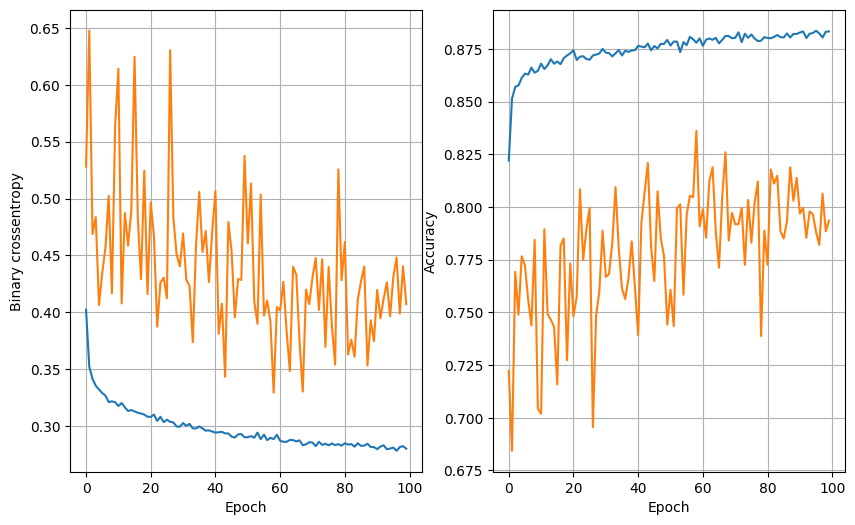

119/119 [==============================] - 0s 2ms/step - loss: 0.3259 - accuracy: 0.8728
16 num_nodes,dropout 0, lr 0.01, batch_size 63


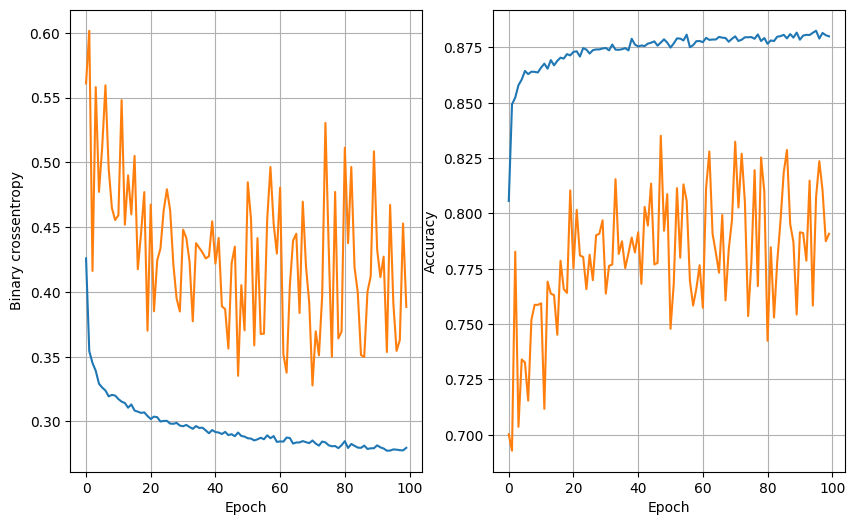

119/119 [==============================] - 0s 2ms/step - loss: 0.3262 - accuracy: 0.8654
16 num_nodes,dropout 0, lr 0.01, batch_size 128


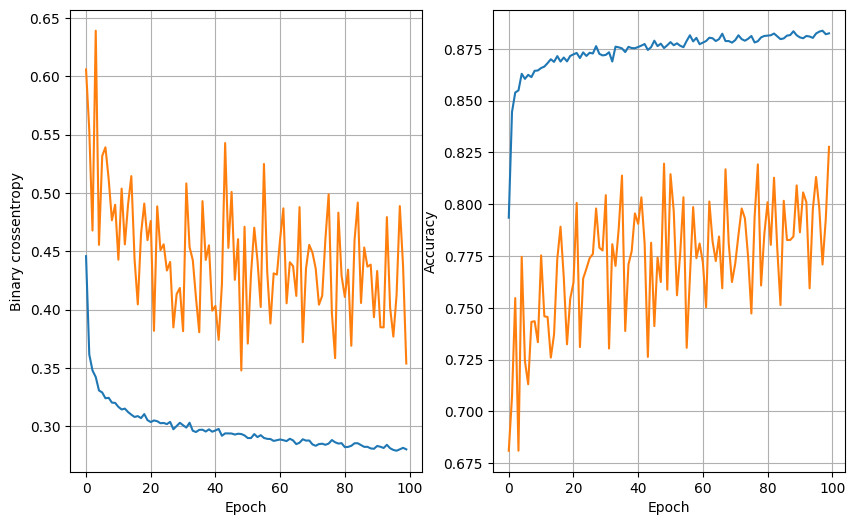

119/119 [==============================] - 0s 2ms/step - loss: 0.3313 - accuracy: 0.8609
16 num_nodes,dropout 0, lr 0.005, batch_size 32


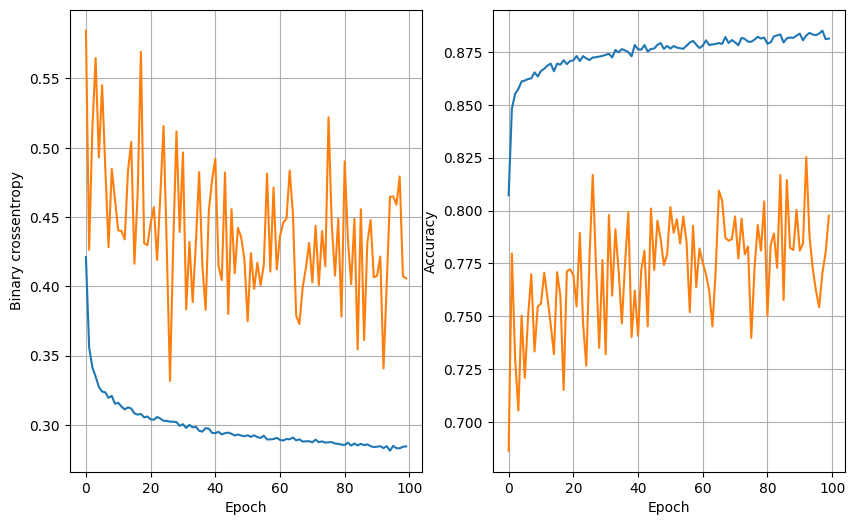

119/119 [==============================] - 0s 2ms/step - loss: 0.3048 - accuracy: 0.8730
16 num_nodes,dropout 0, lr 0.005, batch_size 63


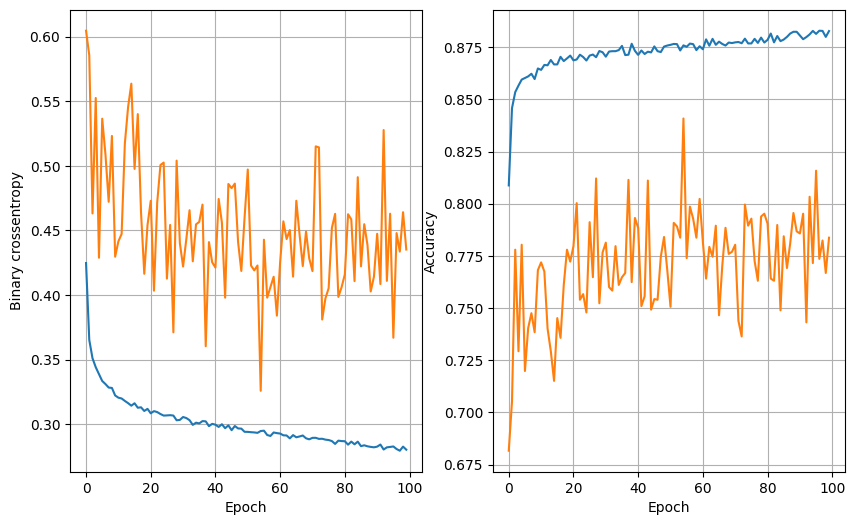

119/119 [==============================] - 0s 2ms/step - loss: 0.3247 - accuracy: 0.8691
16 num_nodes,dropout 0, lr 0.005, batch_size 128


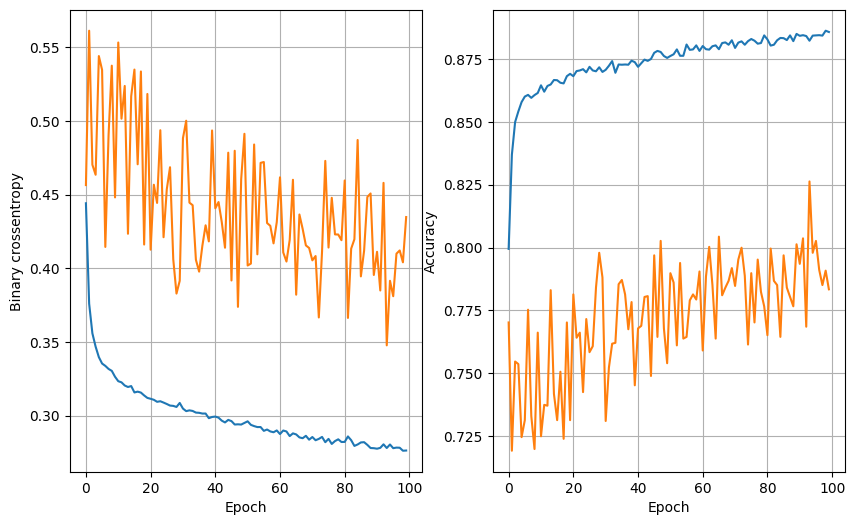

119/119 [==============================] - 0s 2ms/step - loss: 0.3082 - accuracy: 0.8759
16 num_nodes,dropout 0, lr 0.001, batch_size 32


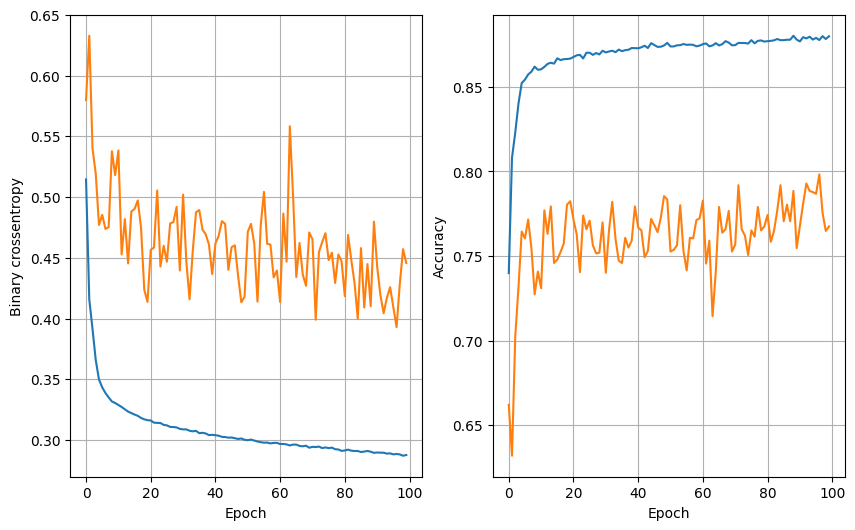

119/119 [==============================] - 0s 2ms/step - loss: 0.3014 - accuracy: 0.8762
16 num_nodes,dropout 0, lr 0.001, batch_size 63


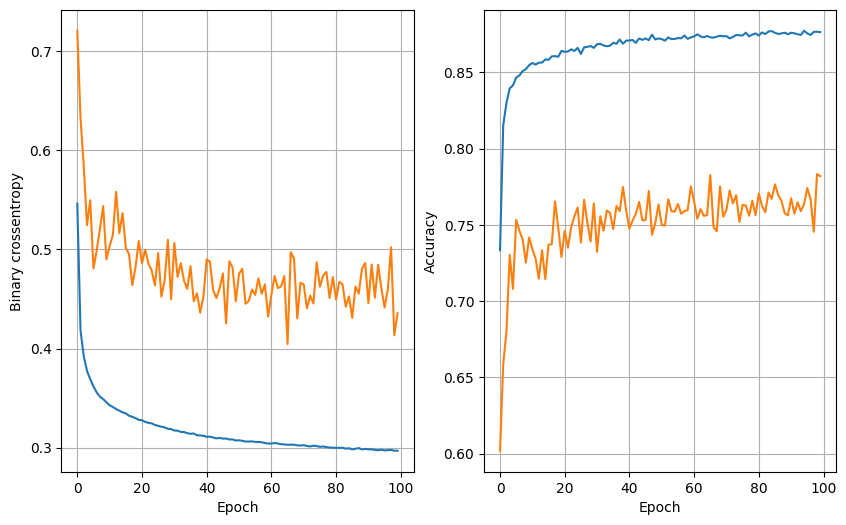

119/119 [==============================] - 0s 2ms/step - loss: 0.3151 - accuracy: 0.8693
16 num_nodes,dropout 0, lr 0.001, batch_size 128


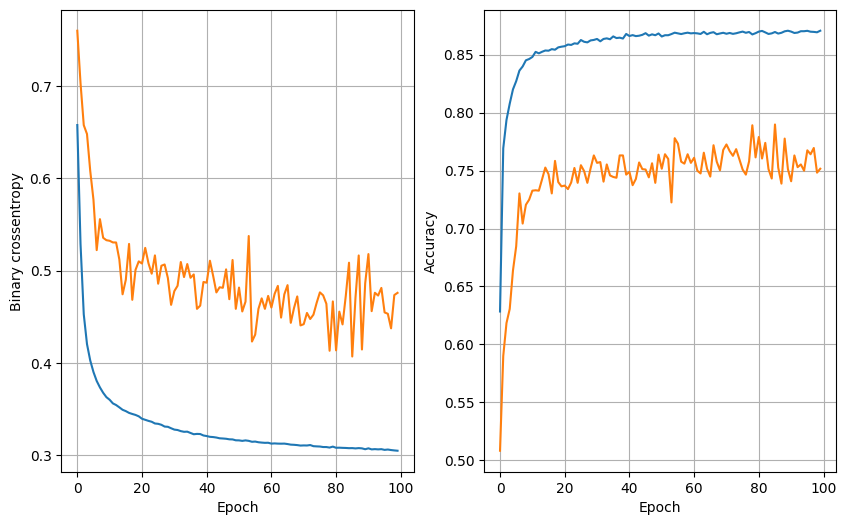

119/119 [==============================] - 0s 2ms/step - loss: 0.3149 - accuracy: 0.8672
16 num_nodes,dropout 0.2, lr 0.01, batch_size 32


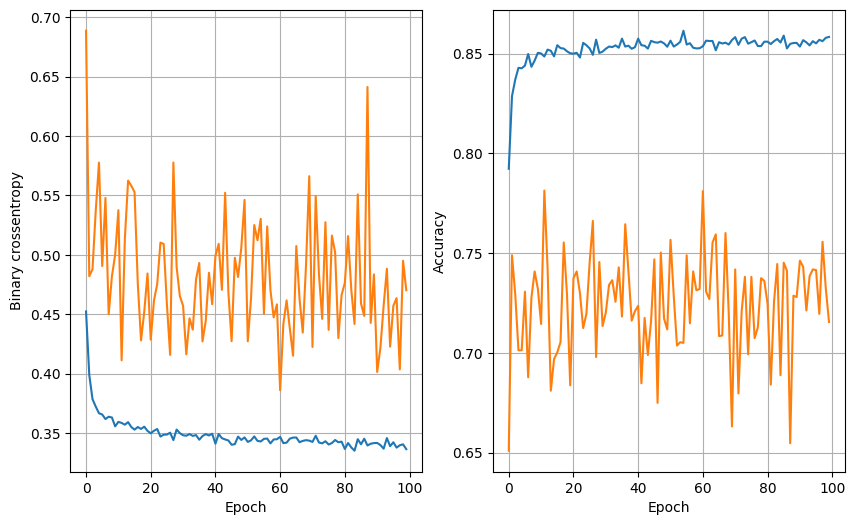

119/119 [==============================] - 1s 5ms/step - loss: 0.3194 - accuracy: 0.8644
16 num_nodes,dropout 0.2, lr 0.01, batch_size 63


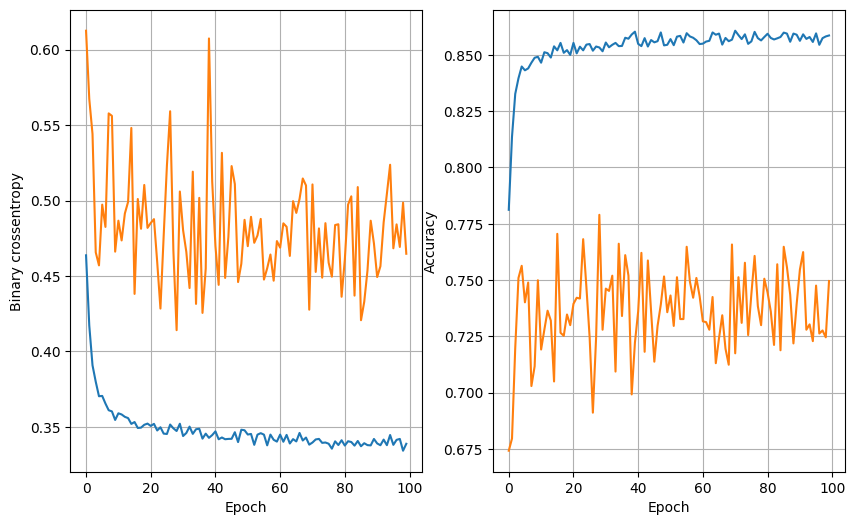

119/119 [==============================] - 0s 2ms/step - loss: 0.3181 - accuracy: 0.8633
16 num_nodes,dropout 0.2, lr 0.01, batch_size 128


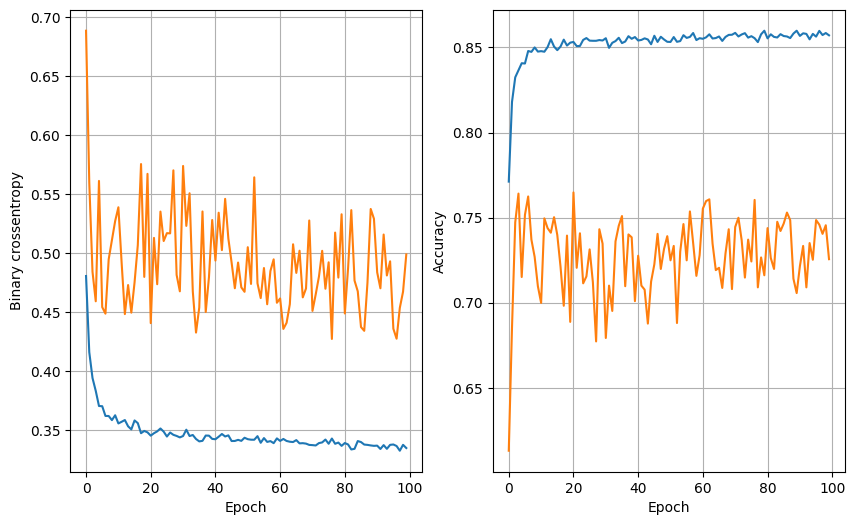

119/119 [==============================] - 0s 3ms/step - loss: 0.3151 - accuracy: 0.8691
16 num_nodes,dropout 0.2, lr 0.005, batch_size 32


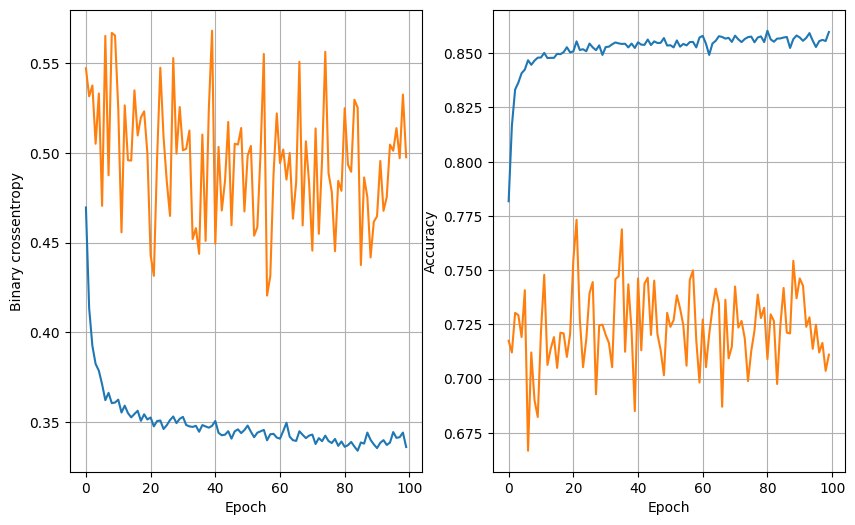

119/119 [==============================] - 0s 2ms/step - loss: 0.3148 - accuracy: 0.8680
16 num_nodes,dropout 0.2, lr 0.005, batch_size 63


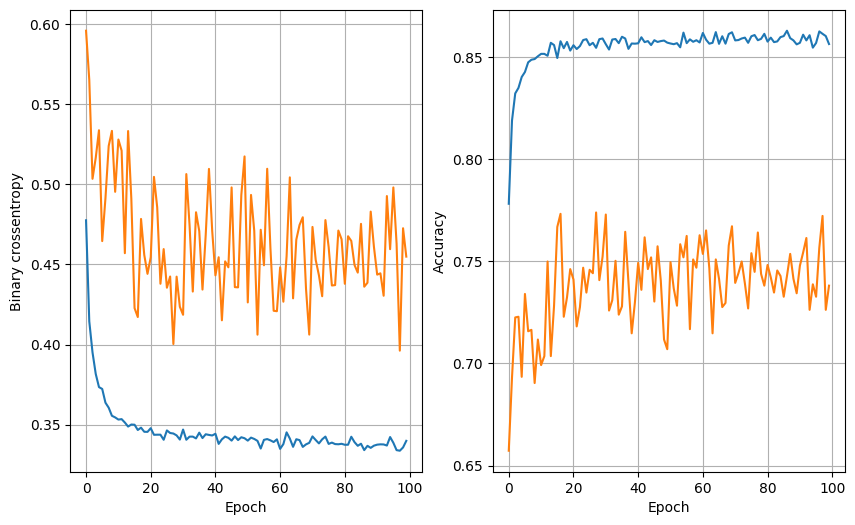

119/119 [==============================] - 0s 2ms/step - loss: 0.3149 - accuracy: 0.8715
16 num_nodes,dropout 0.2, lr 0.005, batch_size 128


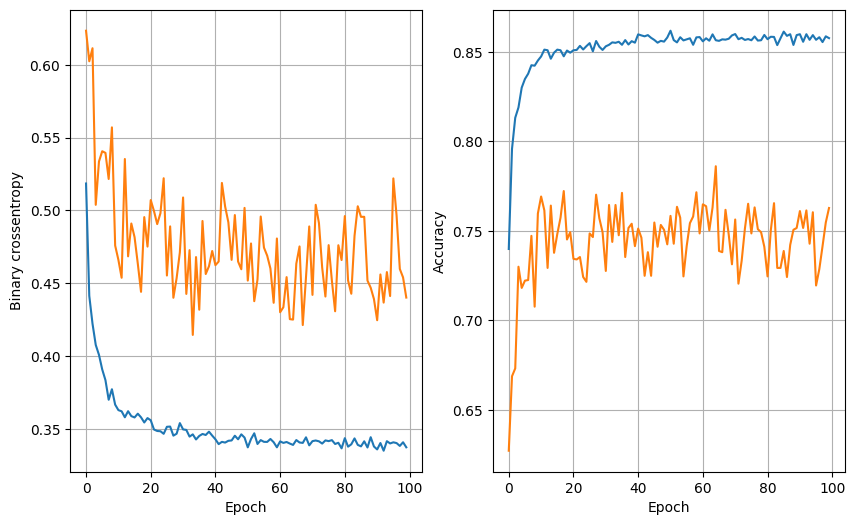

119/119 [==============================] - 0s 2ms/step - loss: 0.3112 - accuracy: 0.8701
16 num_nodes,dropout 0.2, lr 0.001, batch_size 32


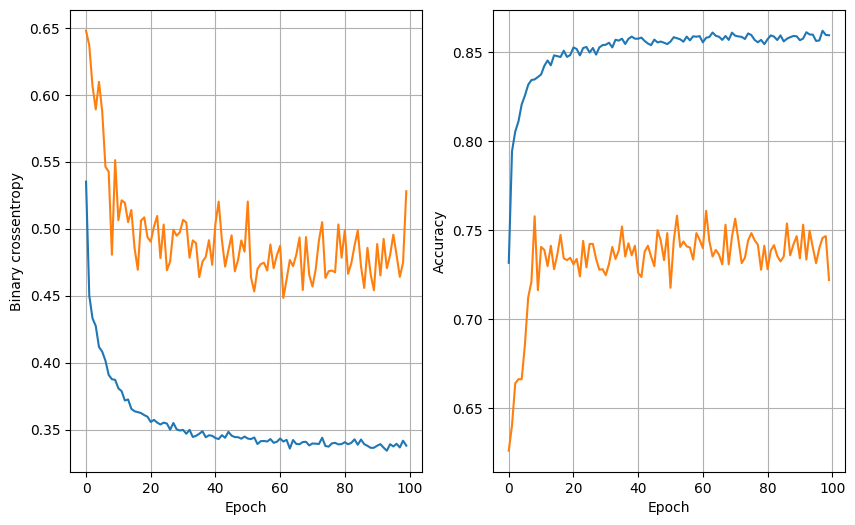

119/119 [==============================] - 0s 2ms/step - loss: 0.3196 - accuracy: 0.8644
16 num_nodes,dropout 0.2, lr 0.001, batch_size 63


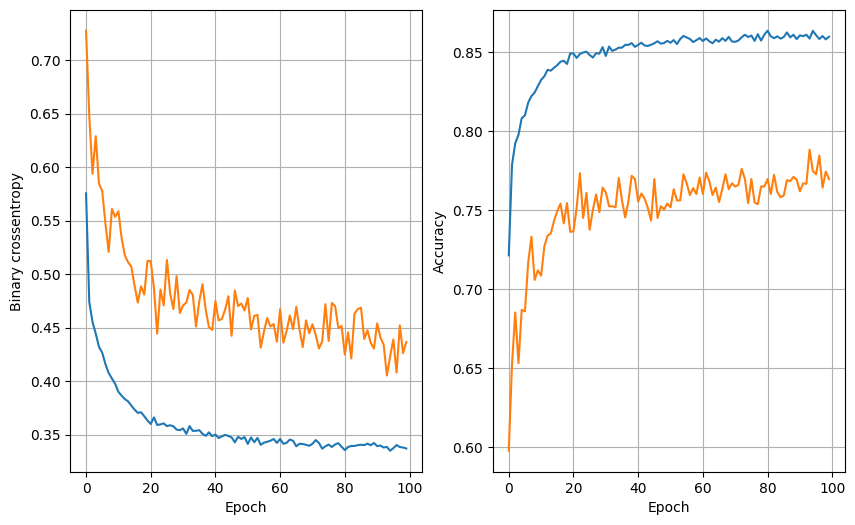

119/119 [==============================] - 0s 3ms/step - loss: 0.3157 - accuracy: 0.8651
16 num_nodes,dropout 0.2, lr 0.001, batch_size 128


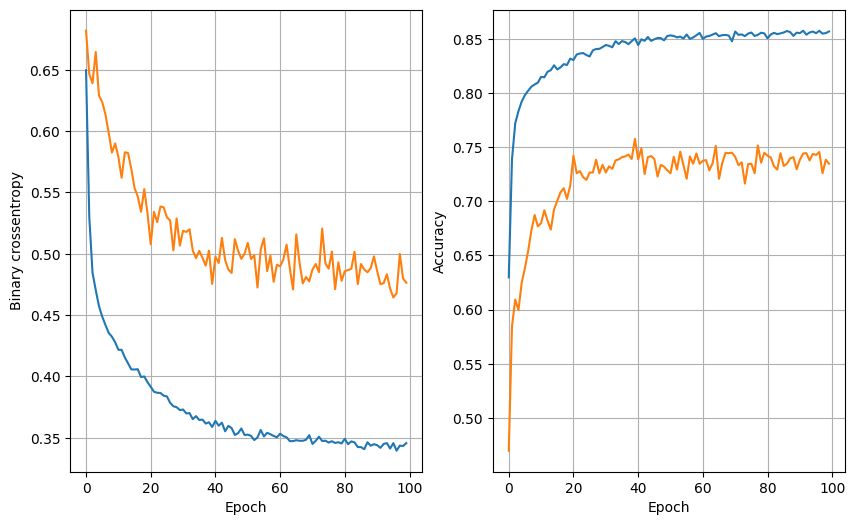

119/119 [==============================] - 1s 4ms/step - loss: 0.3162 - accuracy: 0.8665
32 num_nodes,dropout 0, lr 0.01, batch_size 32


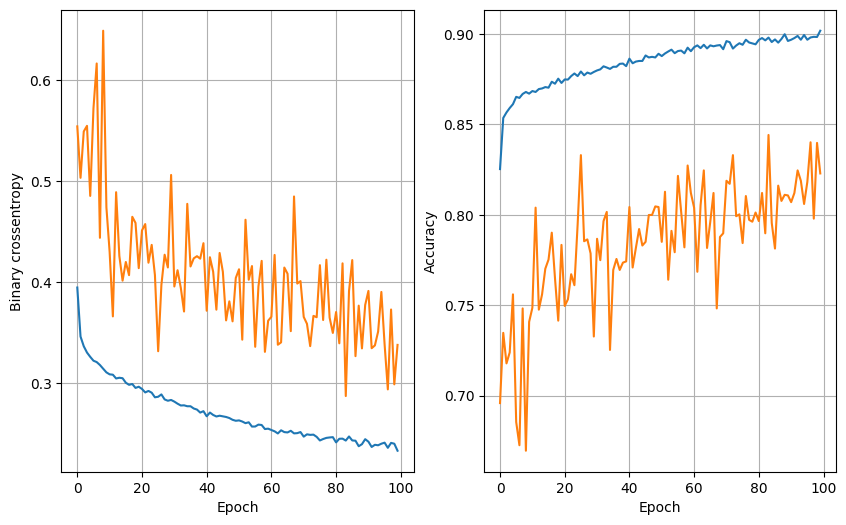

119/119 [==============================] - 0s 2ms/step - loss: 0.3773 - accuracy: 0.8715
32 num_nodes,dropout 0, lr 0.01, batch_size 63


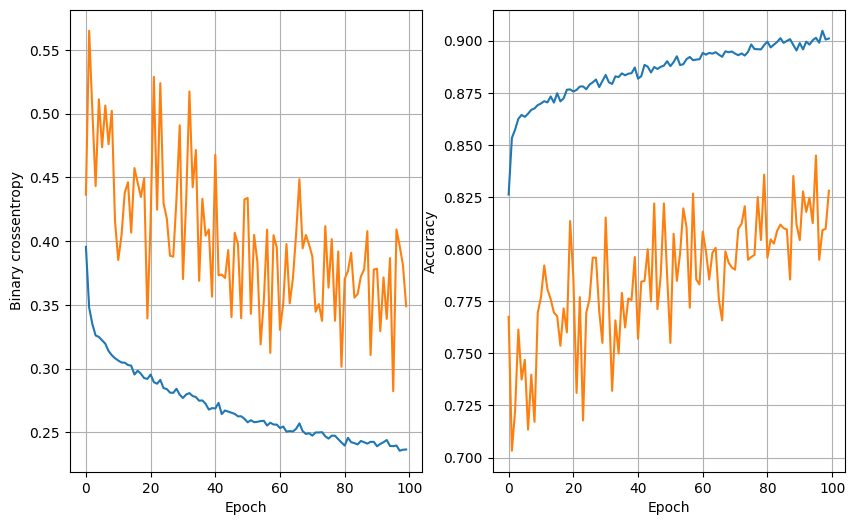

119/119 [==============================] - 0s 3ms/step - loss: 0.4041 - accuracy: 0.8654
32 num_nodes,dropout 0, lr 0.01, batch_size 128


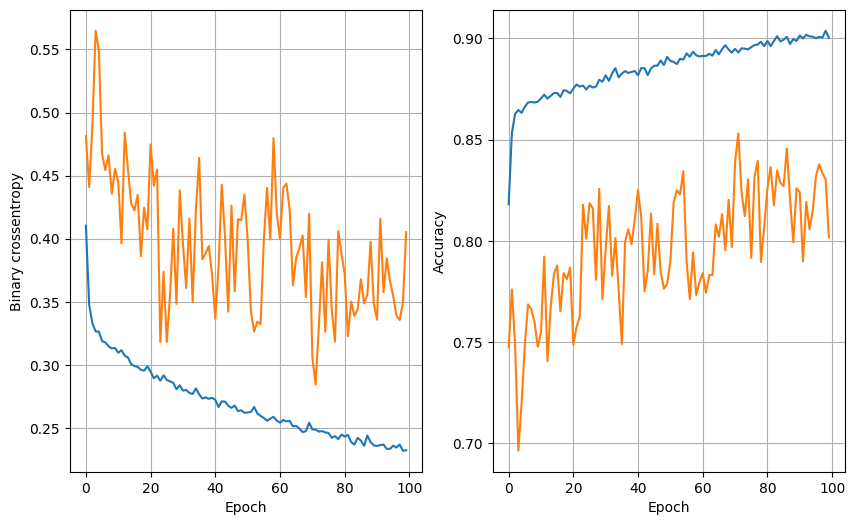

119/119 [==============================] - 0s 3ms/step - loss: 0.3680 - accuracy: 0.8699
32 num_nodes,dropout 0, lr 0.005, batch_size 32


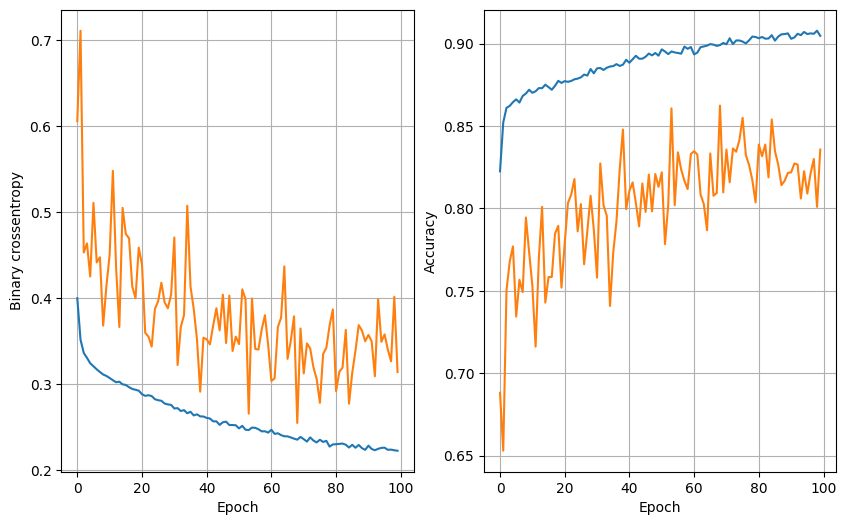

119/119 [==============================] - 0s 2ms/step - loss: 0.3765 - accuracy: 0.8623
32 num_nodes,dropout 0, lr 0.005, batch_size 63


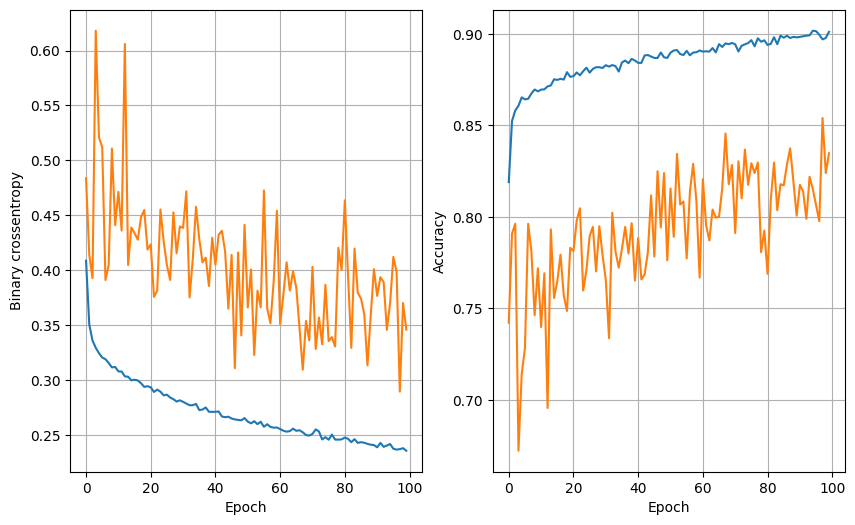

119/119 [==============================] - 0s 2ms/step - loss: 0.3874 - accuracy: 0.8601
32 num_nodes,dropout 0, lr 0.005, batch_size 128


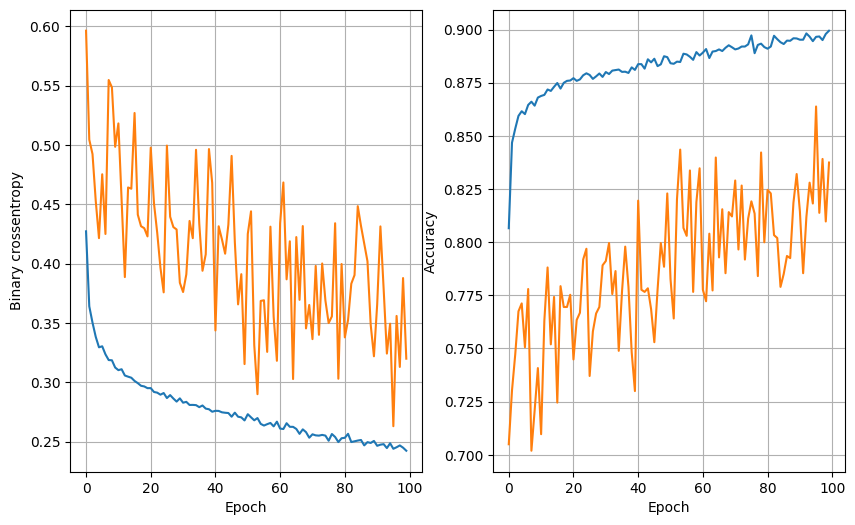

119/119 [==============================] - 0s 2ms/step - loss: 0.3289 - accuracy: 0.8667
32 num_nodes,dropout 0, lr 0.001, batch_size 32


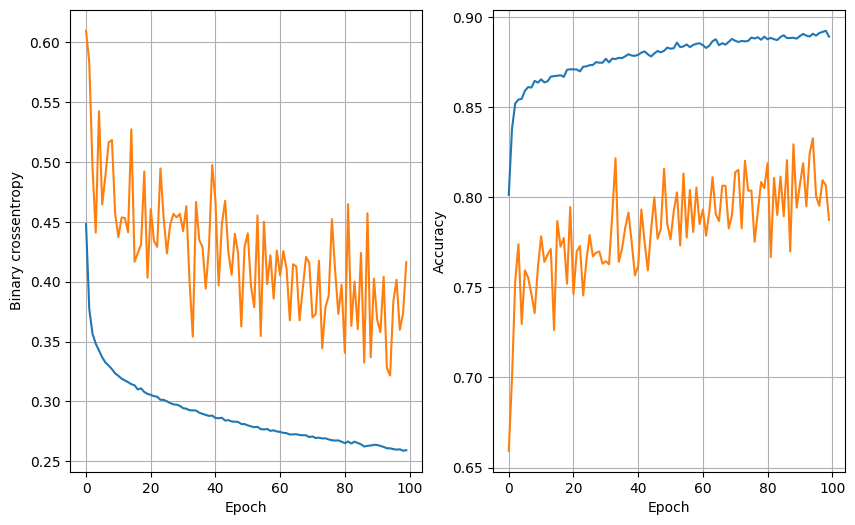

119/119 [==============================] - 0s 2ms/step - loss: 0.3176 - accuracy: 0.8754
32 num_nodes,dropout 0, lr 0.001, batch_size 63


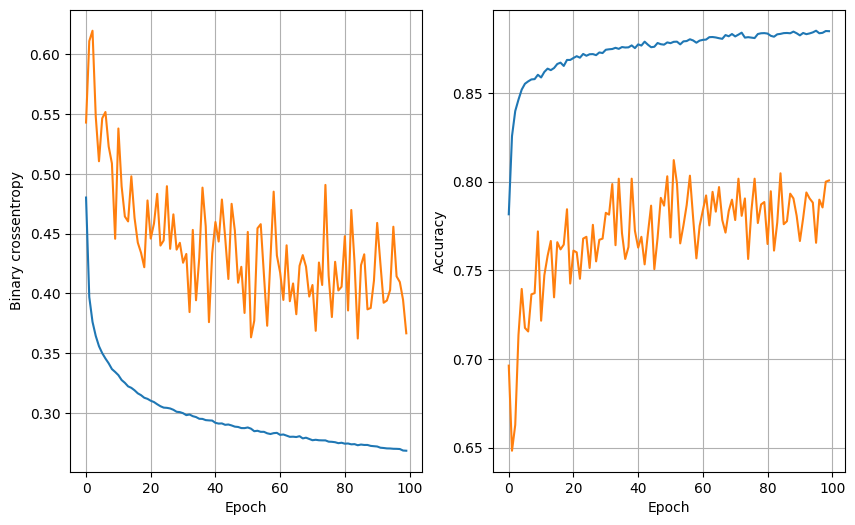

119/119 [==============================] - 0s 2ms/step - loss: 0.3154 - accuracy: 0.8717
32 num_nodes,dropout 0, lr 0.001, batch_size 128


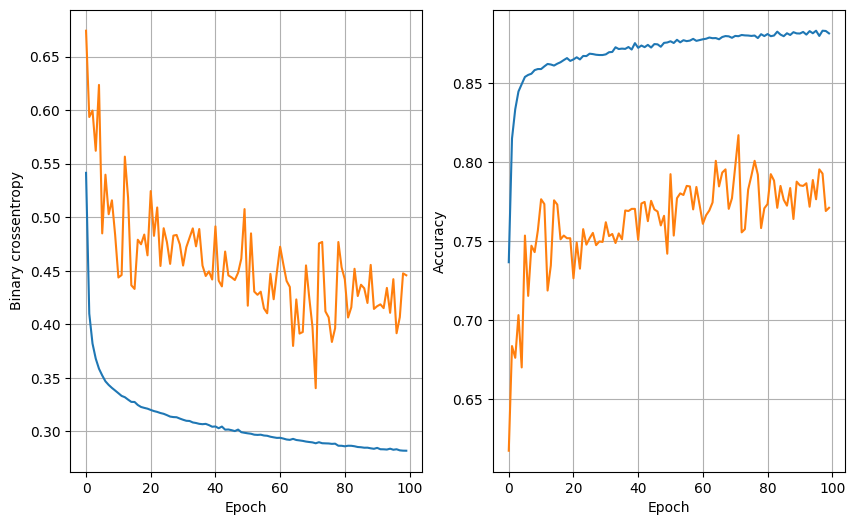

119/119 [==============================] - 0s 2ms/step - loss: 0.3041 - accuracy: 0.8770
32 num_nodes,dropout 0.2, lr 0.01, batch_size 32


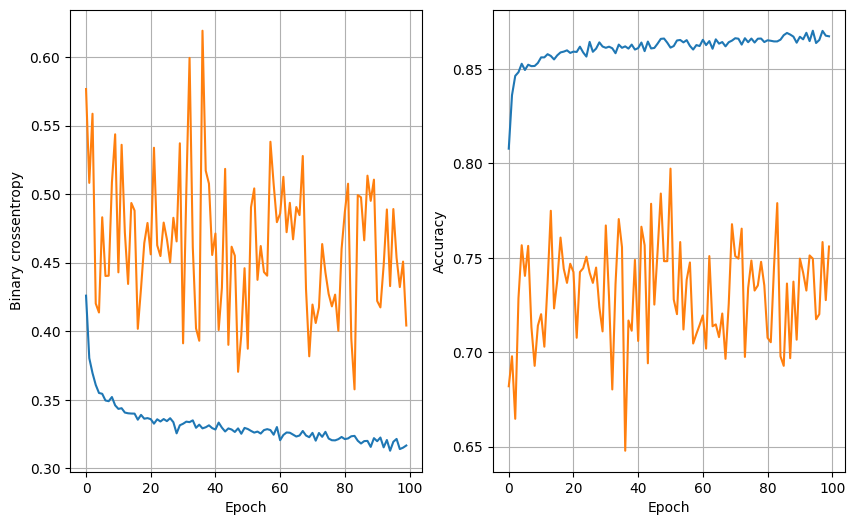

119/119 [==============================] - 0s 2ms/step - loss: 0.3081 - accuracy: 0.8741
32 num_nodes,dropout 0.2, lr 0.01, batch_size 63


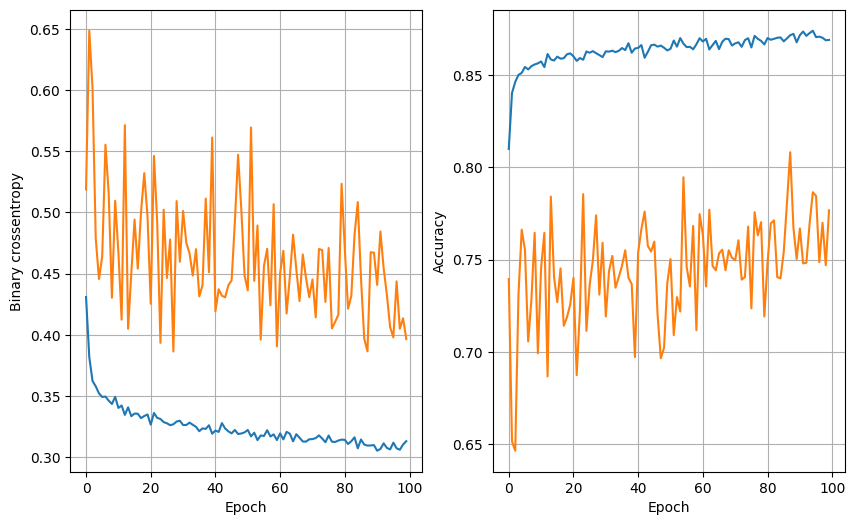

119/119 [==============================] - 0s 2ms/step - loss: 0.3039 - accuracy: 0.8796
32 num_nodes,dropout 0.2, lr 0.01, batch_size 128


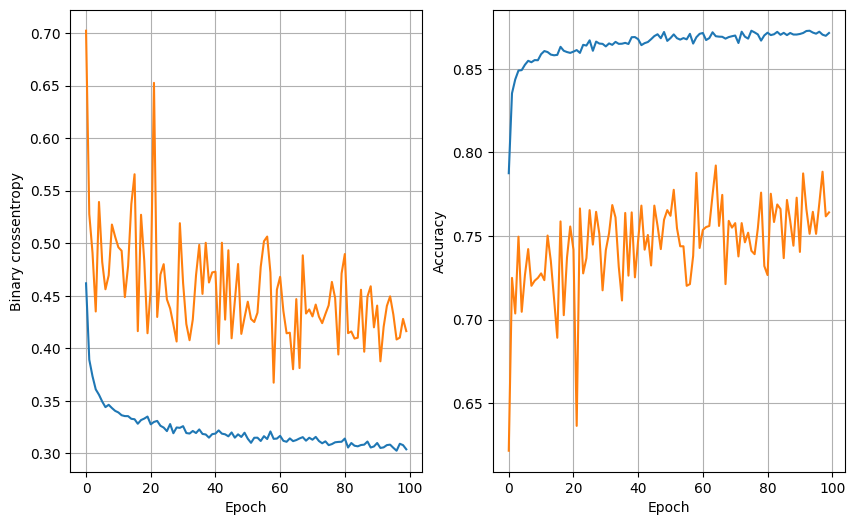

119/119 [==============================] - 0s 3ms/step - loss: 0.3019 - accuracy: 0.8762
32 num_nodes,dropout 0.2, lr 0.005, batch_size 32


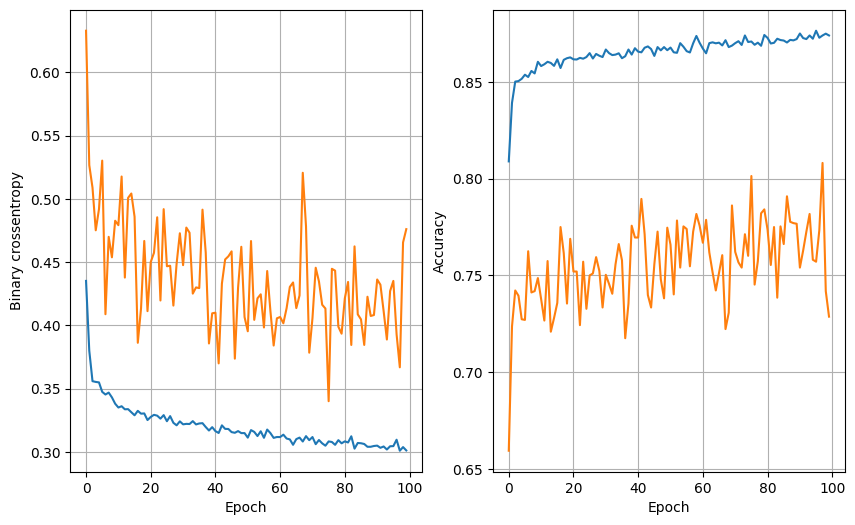

119/119 [==============================] - 0s 2ms/step - loss: 0.3082 - accuracy: 0.8733
32 num_nodes,dropout 0.2, lr 0.005, batch_size 63


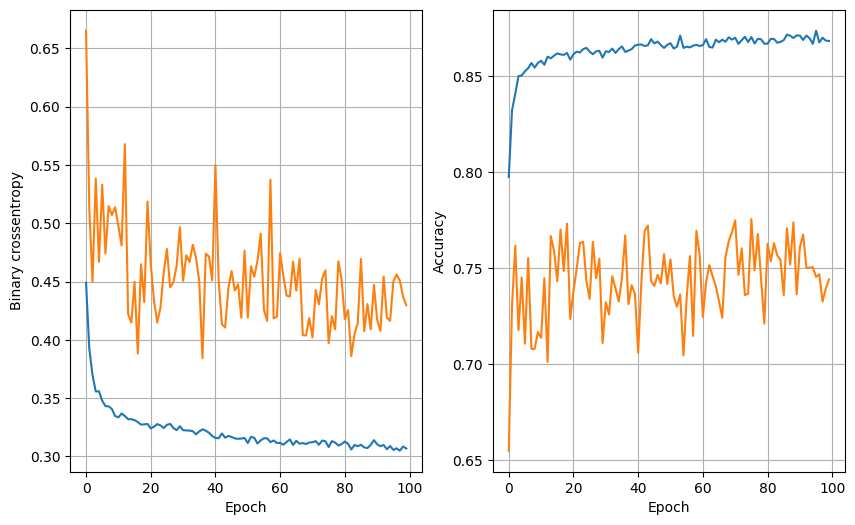

119/119 [==============================] - 0s 3ms/step - loss: 0.3077 - accuracy: 0.8701
32 num_nodes,dropout 0.2, lr 0.005, batch_size 128


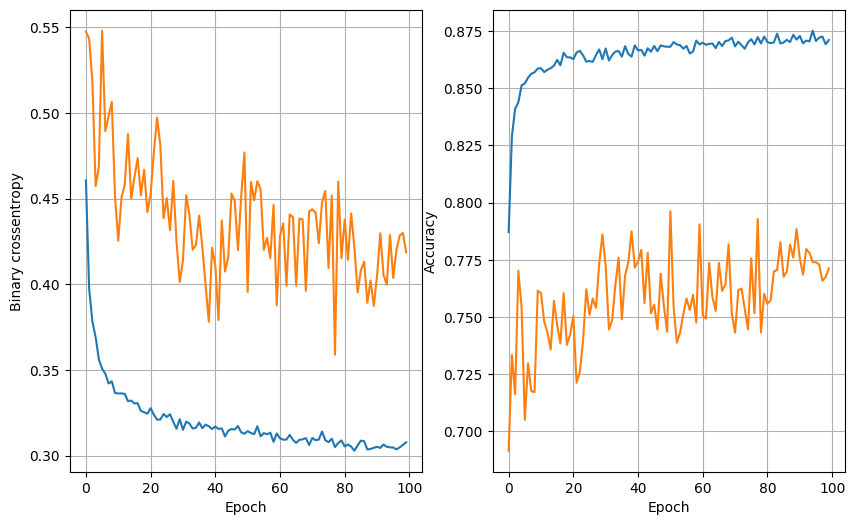

119/119 [==============================] - 0s 2ms/step - loss: 0.3065 - accuracy: 0.8733
32 num_nodes,dropout 0.2, lr 0.001, batch_size 32


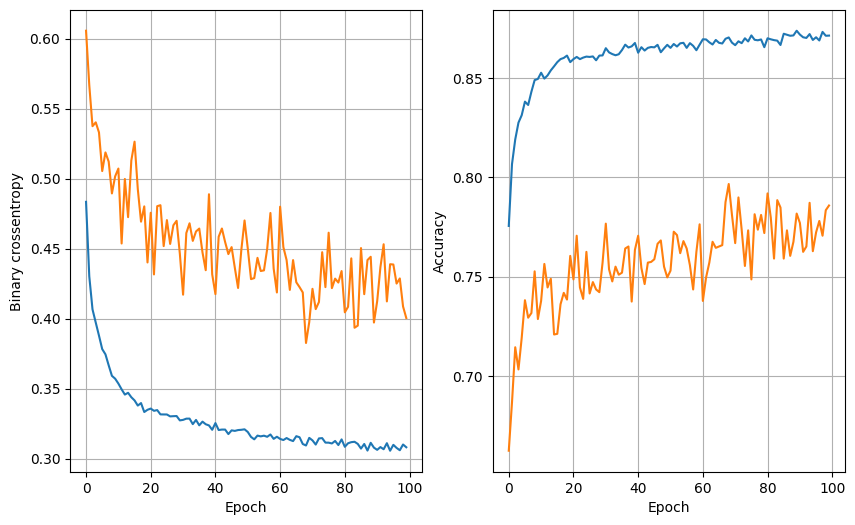

119/119 [==============================] - 0s 3ms/step - loss: 0.3062 - accuracy: 0.8722
32 num_nodes,dropout 0.2, lr 0.001, batch_size 63


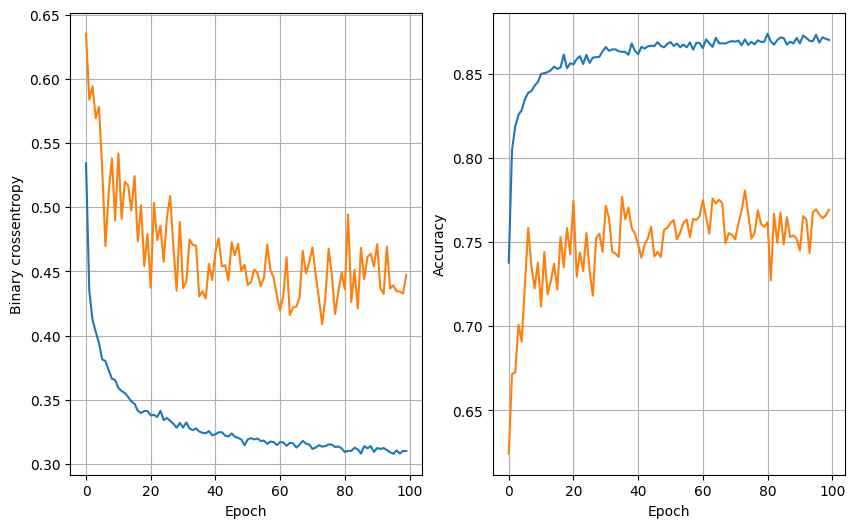

119/119 [==============================] - 0s 3ms/step - loss: 0.3029 - accuracy: 0.8754
32 num_nodes,dropout 0.2, lr 0.001, batch_size 128


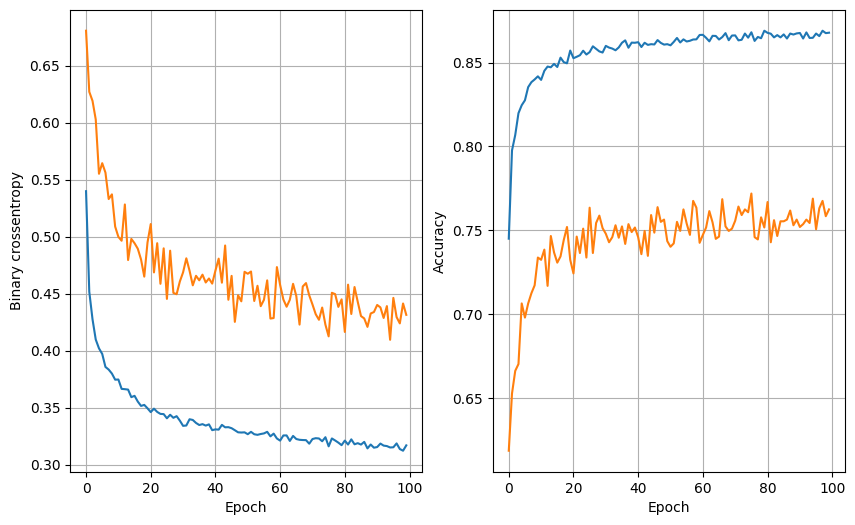

119/119 [==============================] - 0s 3ms/step - loss: 0.3061 - accuracy: 0.8720
64 num_nodes,dropout 0, lr 0.01, batch_size 32


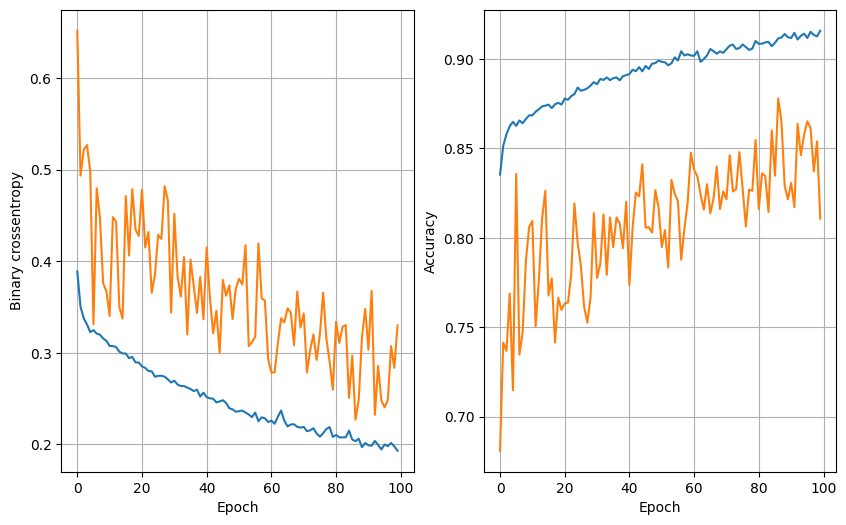

119/119 [==============================] - 0s 2ms/step - loss: 0.4854 - accuracy: 0.8646
64 num_nodes,dropout 0, lr 0.01, batch_size 63


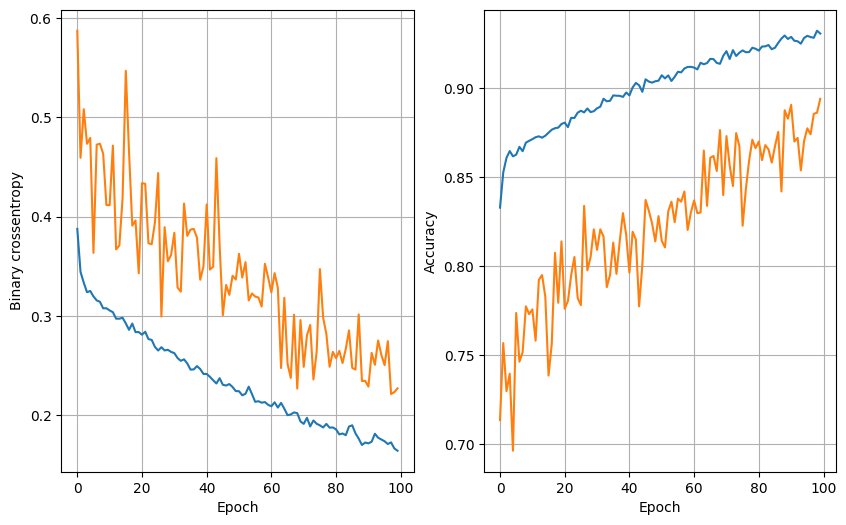

119/119 [==============================] - 0s 2ms/step - loss: 0.5992 - accuracy: 0.8525
64 num_nodes,dropout 0, lr 0.01, batch_size 128


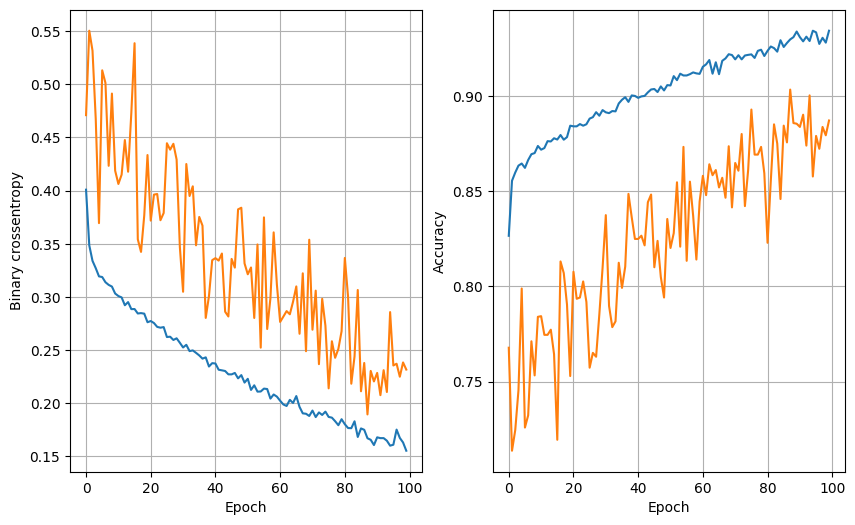

119/119 [==============================] - 0s 3ms/step - loss: 0.5297 - accuracy: 0.8596
64 num_nodes,dropout 0, lr 0.005, batch_size 32


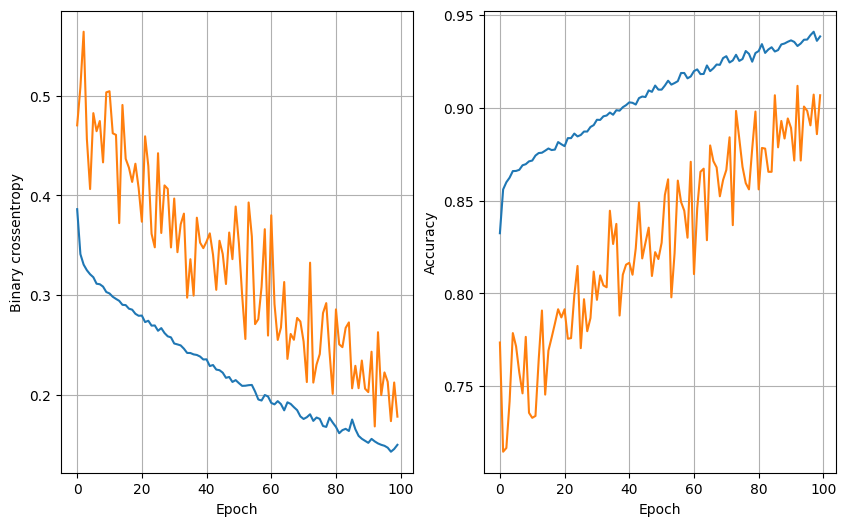

119/119 [==============================] - 0s 2ms/step - loss: 0.6040 - accuracy: 0.8528
64 num_nodes,dropout 0, lr 0.005, batch_size 63


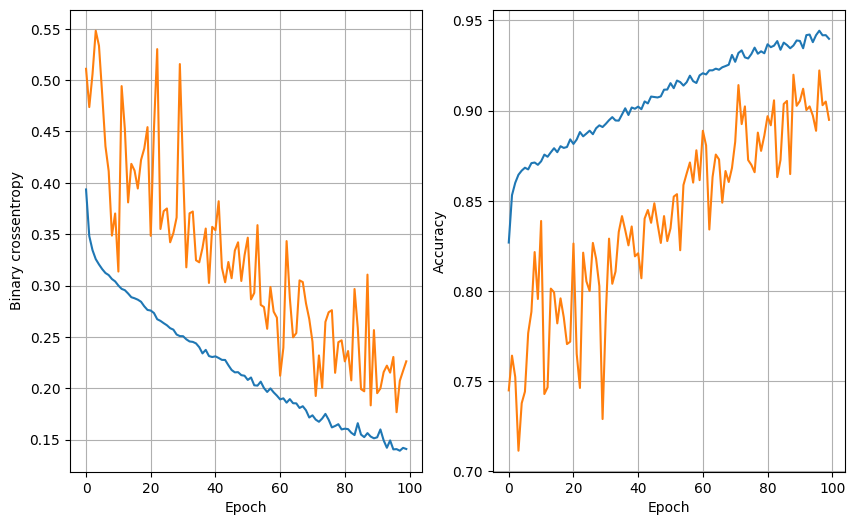

119/119 [==============================] - 0s 3ms/step - loss: 0.5854 - accuracy: 0.8499
64 num_nodes,dropout 0, lr 0.005, batch_size 128


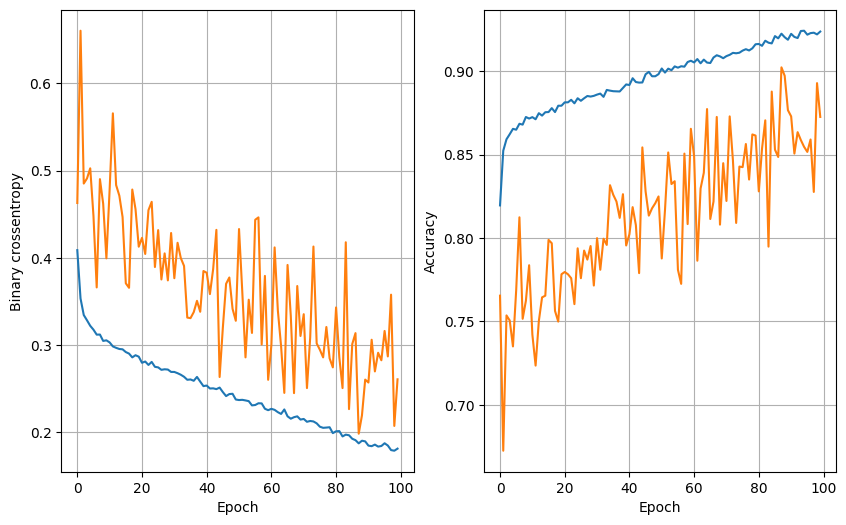

119/119 [==============================] - 0s 2ms/step - loss: 0.4295 - accuracy: 0.8620
64 num_nodes,dropout 0, lr 0.001, batch_size 32


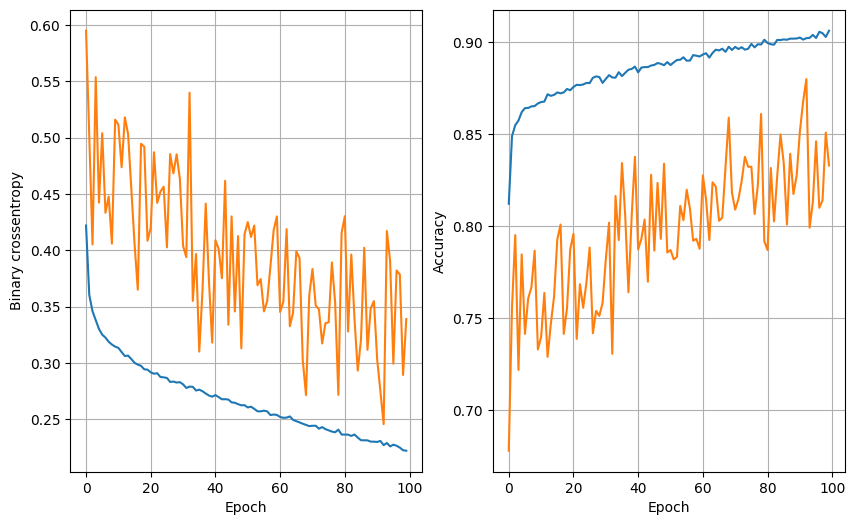

119/119 [==============================] - 0s 3ms/step - loss: 0.3431 - accuracy: 0.8725
64 num_nodes,dropout 0, lr 0.001, batch_size 63


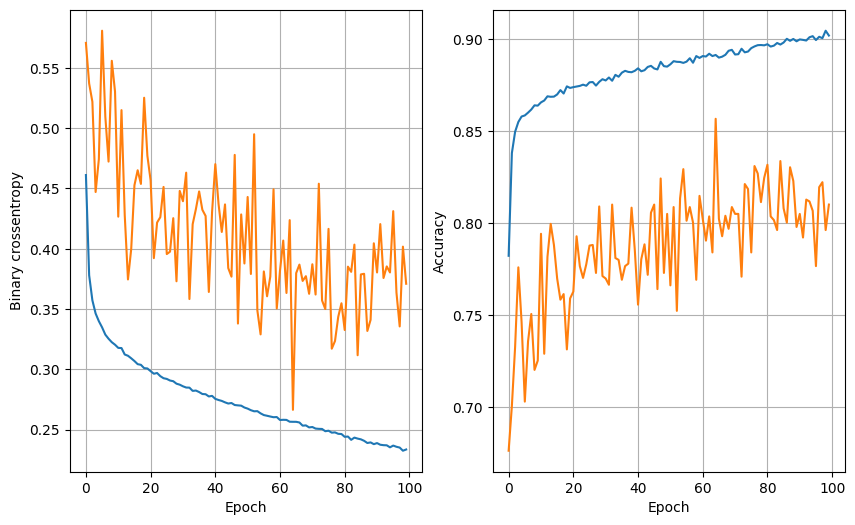

119/119 [==============================] - 0s 2ms/step - loss: 0.3223 - accuracy: 0.8728
64 num_nodes,dropout 0, lr 0.001, batch_size 128


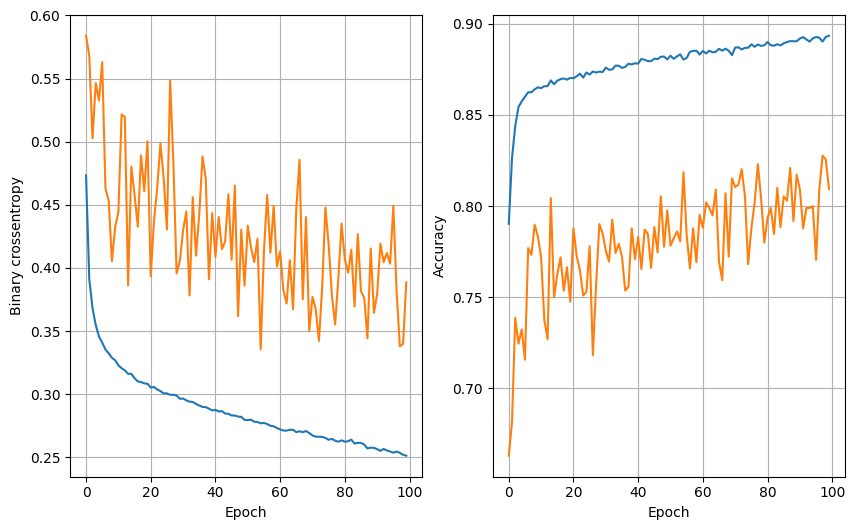

119/119 [==============================] - 0s 3ms/step - loss: 0.3212 - accuracy: 0.8746
64 num_nodes,dropout 0.2, lr 0.01, batch_size 32


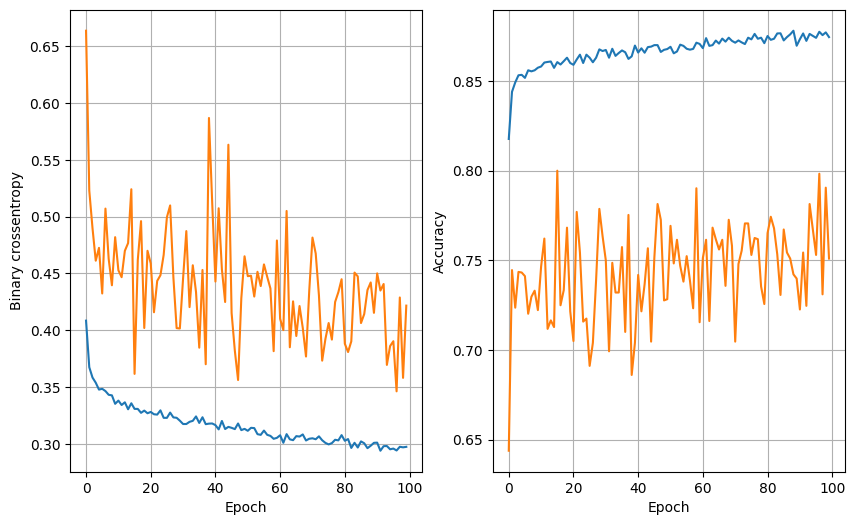

119/119 [==============================] - 0s 3ms/step - loss: 0.3078 - accuracy: 0.8730
64 num_nodes,dropout 0.2, lr 0.01, batch_size 63


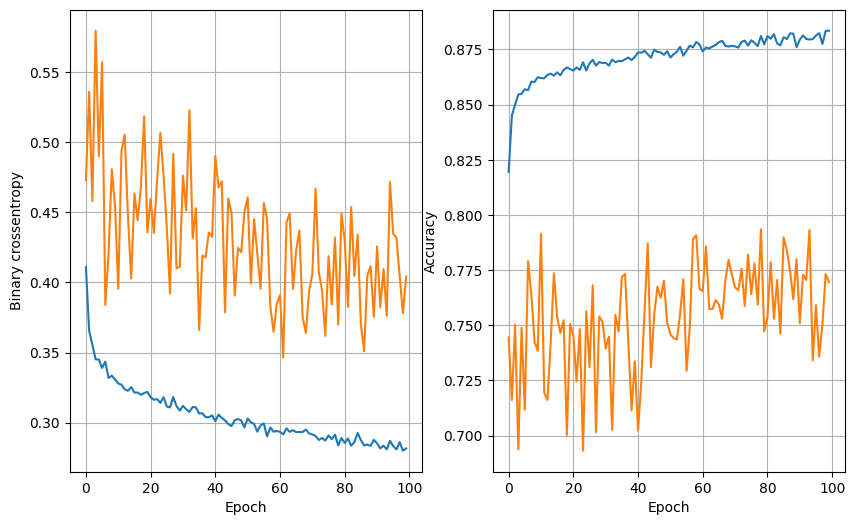

119/119 [==============================] - 0s 2ms/step - loss: 0.3131 - accuracy: 0.8770
64 num_nodes,dropout 0.2, lr 0.01, batch_size 128


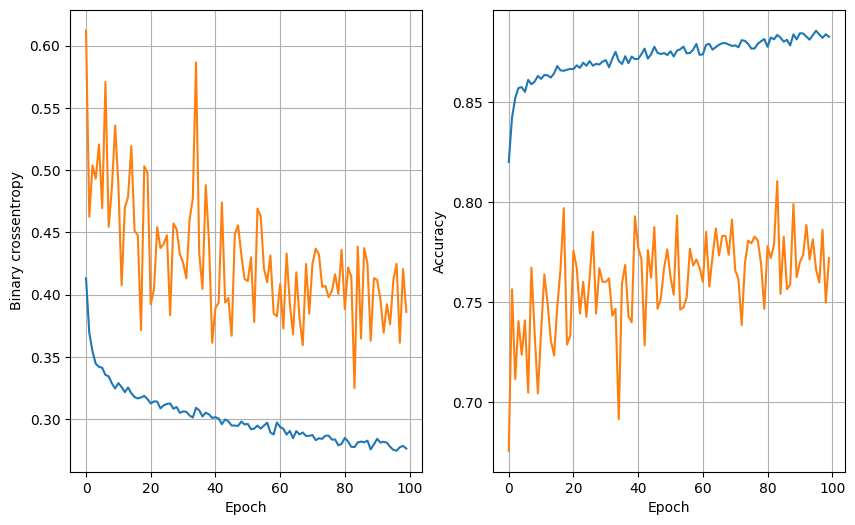

119/119 [==============================] - 0s 2ms/step - loss: 0.3040 - accuracy: 0.8775
64 num_nodes,dropout 0.2, lr 0.005, batch_size 32


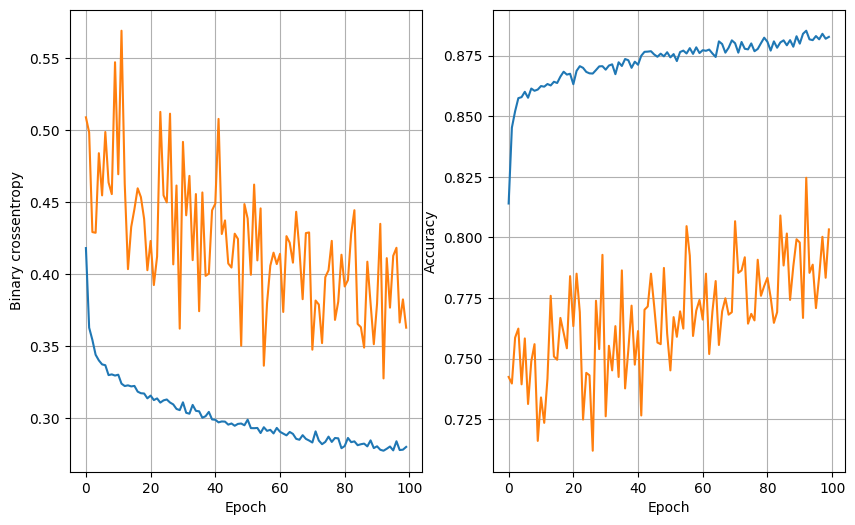

119/119 [==============================] - 1s 5ms/step - loss: 0.3189 - accuracy: 0.8738
64 num_nodes,dropout 0.2, lr 0.005, batch_size 63


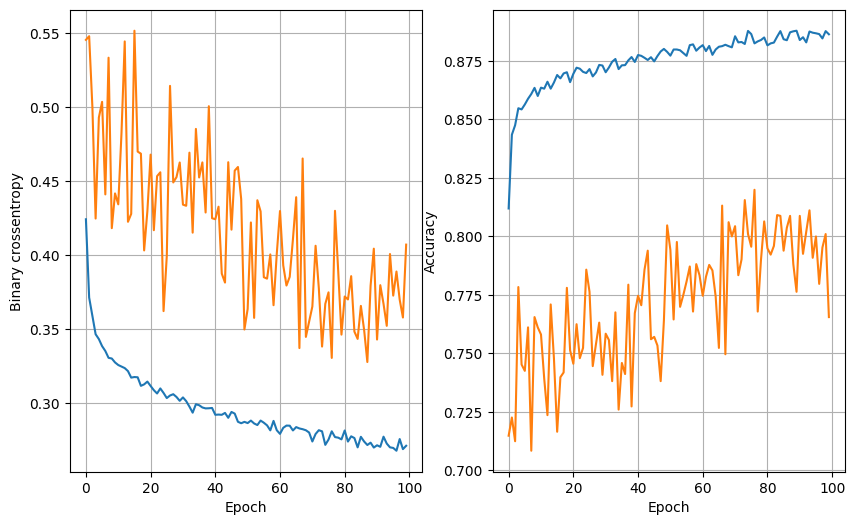

119/119 [==============================] - 1s 4ms/step - loss: 0.3122 - accuracy: 0.8770
64 num_nodes,dropout 0.2, lr 0.005, batch_size 128


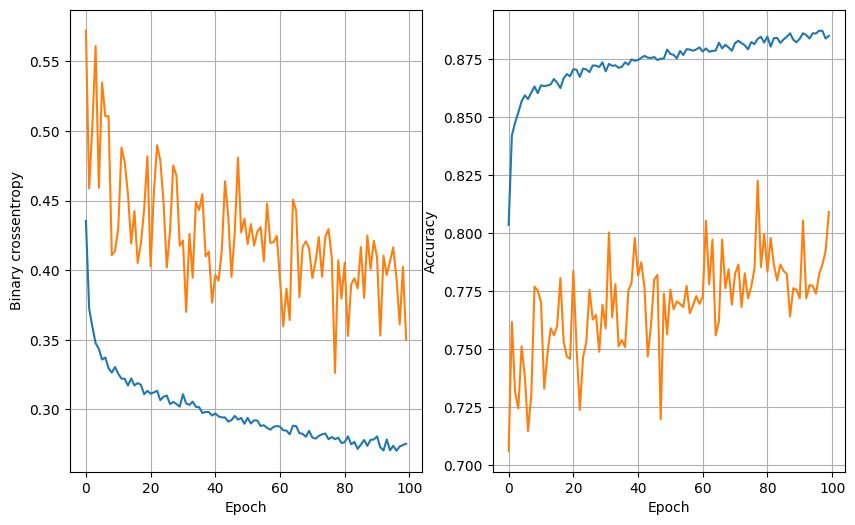

119/119 [==============================] - 0s 2ms/step - loss: 0.3067 - accuracy: 0.8825
64 num_nodes,dropout 0.2, lr 0.001, batch_size 32


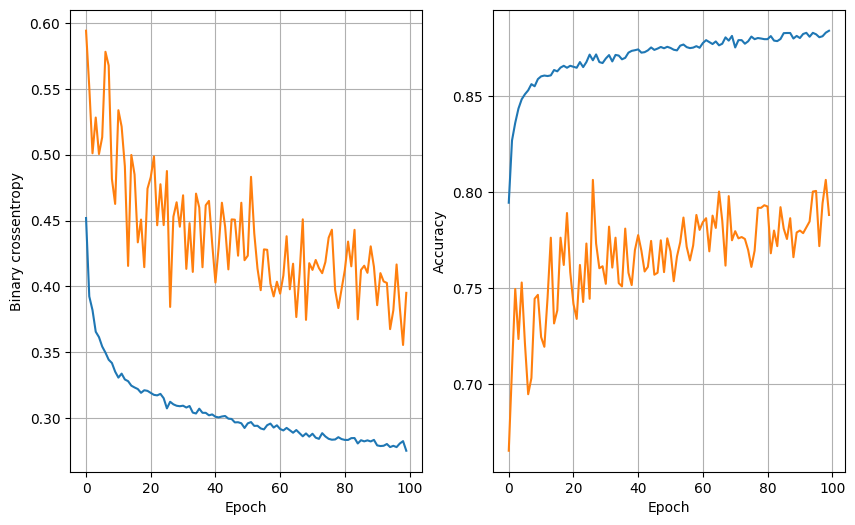

119/119 [==============================] - 1s 4ms/step - loss: 0.2984 - accuracy: 0.8846
64 num_nodes,dropout 0.2, lr 0.001, batch_size 63


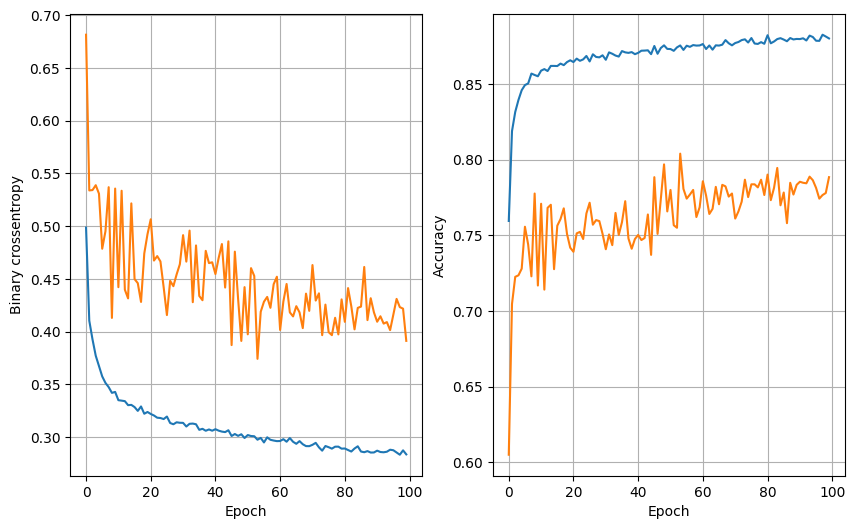

119/119 [==============================] - 0s 3ms/step - loss: 0.2994 - accuracy: 0.8767
64 num_nodes,dropout 0.2, lr 0.001, batch_size 128


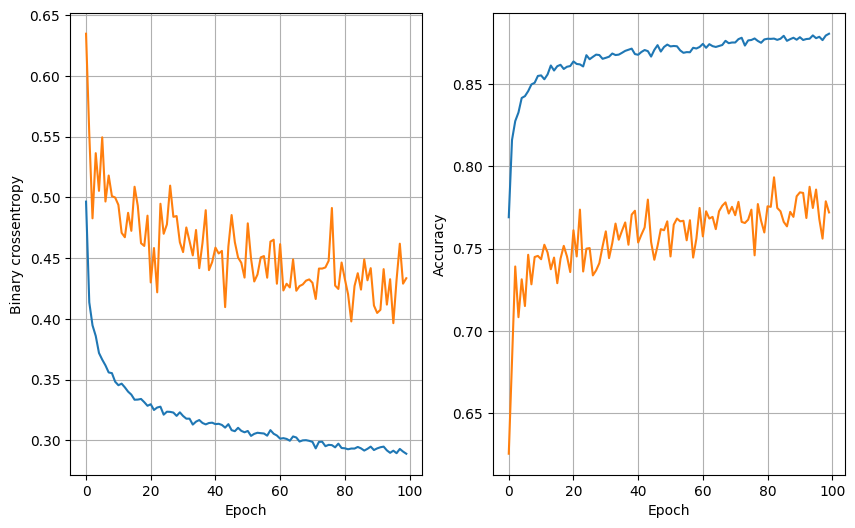

119/119 [==============================] - 1s 4ms/step - loss: 0.2984 - accuracy: 0.8783


In [24]:
least_val_loss = float("inf")
least_loss_model=None
epochs=100
for num_nodes in [16,32,64]:
  for dropout_probs in [ 0,0.2]:
    for lr in [0.01,0.005,0.001]:
      for batch_size in [32,63,128]:
        print(f"{num_nodes} num_nodes,dropout {dropout_probs}, lr {lr}, batch_size {batch_size}")
        model,history = train_model(X_train,y_train,num_nodes,dropout_probs,lr,batch_size,epochs)
        plot_history(history)
        val_loss = model.evaluate(X_valid,y_valid)[0]
        if val_loss < least_val_loss:
          least_val_loss = val_loss
          least_loss_model = model


In [25]:
y_pred=least_loss_model.predict(X_test)
y_pred = (y_pred>0.5).astype(int).reshape(-1,)

119/119 [==============================] - 0s 2ms/step


In [26]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.75      0.80      1300
           1       0.88      0.94      0.91      2504

    accuracy                           0.88      3804
   macro avg       0.87      0.85      0.86      3804
weighted avg       0.87      0.88      0.87      3804

